# Elastic Net Regression

## Introduction
Elastic Net Regression is a regression method that combines L1 and L2 regularization. This means it utilizes both Ridge Regression (L2) and Lasso Regression (L1). This makes it highly effective when there are multiple correlated features in the data. The primary goal of Elastic Net Regression is to find a balance between model simplicity and accuracy, much like Ridge and Lasso. It achieves this by adding penalty terms to the traditional linear regression model, which encourage sparse solutions (Lasso) and handle multicollinearity (Ridge).

## Uses of Elastic Net Regression
Elastic Net Regression is a regularization technique that is used over regular regression methods for more accurate prediction. This model uses shrinkage, where data values are shrunk towards a central point like the mean. The Elastic Net procedure encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

## Examples of Elastic Net Regression
Here are some examples of Elastic Net Regression in real life:

- **Genomic Data Analysis**: When the number of predictor variables is significantly larger than the number of observations, you'll want to choose Elastic Net Regression over multiple linear regression. This is very typical of genomic data. Each individual has tens of thousands of genes.
- **Group Elastic Net Regression**: In some contexts, we may wish to treat a set of regressors as a group, for example, when we have a categorical covariate variable with more than two levels. Group Elastic Net Regression addresses this problem by considering the simultaneous shrinkage of (pre-defined) groups of coefficients.

For a data scientist, understanding Elastic Net Regression is crucial as it provides a solid foundation for understanding more complex machine learning algorithms. It's also a powerful tool in its own right for making predictions based on a set of related data points. It's particularly useful when dealing with multicollinearity in your data, where two or more predictor variables are highly correlated. It's also useful when you have a large number of features and you want to automatically perform feature selection. Elastic Net Regression provides a balance between Ridge and Lasso, providing the effectiveness of both methods.

# Elastic Net Регрессия

Elastic Net Regression - это метод регрессии, который объединяет L1 и L2 регуляризацию. Это значит, что он использует и Ridge Regression (L2), и Lasso Regression (L1). Это делает его очень эффективным, когда есть множество коррелированных признаков в данных. Основная цель Elastic Net Regression - найти баланс между простотой модели и точностью, как и в случае с Ridge и Lasso. Он достигает этого, добавляя штрафные члены к традиционной модели линейной регрессии, которые стимулируют разреженные решения (Lasso) и обрабатывают мультиколлинеарность (Ridge).

## Применение Elastic Net Regression
Elastic Net Regression - это техника регуляризации, которая используется вместо обычных методов регрессии для более точного прогнозирования. Эта модель использует сжатие, где значения данных сжимаются к центральной точке, такой как среднее значение. Процедура Elastic Net стимулирует простые, разреженные модели (то есть модели с меньшим количеством параметров). Этот конкретный тип регрессии хорошо подходит для моделей, показывающих высокий уровень мультиколлинеарности, или когда вы хотите автоматизировать определенные части выбора модели, такие как выбор переменных / исключение параметров.

## Примеры Elastic Net Regression
Вот несколько примеров Elastic Net Regression в реальной жизни:

- **Анализ геномных данных**: Когда количество предикторных переменных значительно больше, чем количество наблюдений, вы захотите выбрать Elastic Net Regression вместо множественной линейной регрессии. Это очень типично для геномных данных. У каждого человека десятки тысяч генов.
- **Групповая Elastic Net Regression**: В некоторых контекстах мы можем захотеть рассматривать набор регрессоров как группу, например, когда у нас есть категориальная ковариатная переменная с более чем двумя уровнями. Групповая Elastic Net Regression решает эту проблему, рассматривая одновременное сжатие (предварительно определенных) групп коэффициентов.

Для специалиста по данным понимание Elastic Net Regression имеет решающее значение, поскольку оно обеспечивает прочную основу для понимания более сложных алгоритмов машинного обучения. Это также мощный инструмент сам по себе для прогнозирования на основе набора связанных точек данных. Он особенно полезен при работе с мультиколлинеарностью в ваших данных, где две или более предикторных переменных сильно коррелированы. Это также полезно, когда у вас есть большое количество признаков, и вы хотите автоматически выполнить выбор признаков. Elastic Net Regression обеспечивает баланс между Ridge и Lasso, обеспечивая эффективность обоих методов.

Epoch 0, Loss: 400.25787353515625
Epoch 100, Loss: 36.273494720458984
Epoch 200, Loss: 30.109128952026367
Epoch 300, Loss: 30.00466537475586
Epoch 400, Loss: 30.00289535522461
Epoch 500, Loss: 30.00286293029785
Epoch 600, Loss: 30.002866744995117
Epoch 700, Loss: 30.002866744995117
Epoch 800, Loss: 30.002866744995117
Epoch 900, Loss: 30.002866744995117


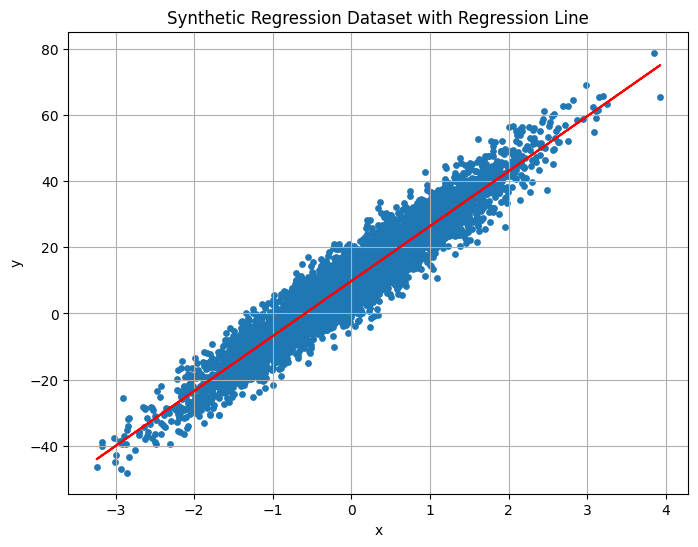

In [2]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

class ElasticNetRegressionModel:
    def __init__(self, n_samples=5000, n_features=1, n_targets=1, noise=5, bias=10, l1_penalty=0.01, l2_penalty=0.01):
        """
        Initialize the ElasticNetRegressionModel with a synthetic dataset.

        Parameters:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_targets (int): The number of targets.
        noise (float): The standard deviation of the Gaussian noise applied to the output.
        bias (float): The bias term in the underlying linear model.
        l1_penalty (float): The L1 penalty term for the Elastic Net regression.
        l2_penalty (float): The L2 penalty term for the Elastic Net regression.
        """
        X_numpy, y_numpy, _ = make_regression(
            n_samples=n_samples,
            n_features=n_features,
            n_targets=n_targets,
            noise=noise,
            bias=bias,
            coef=True,
            random_state=42
        )
        self.X = torch.tensor(X_numpy, dtype=torch.float32)
        self.y = torch.tensor(y_numpy, dtype=torch.float32).view(-1, 1)
        self.model = nn.Linear(self.X.shape[1], self.y.shape[1])
        self.criterion = nn.MSELoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.01)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty

    def train(self, epochs=1000):
        """
        Train the model for a number of epochs.

        Parameters:
        epochs (int): The number of epochs to train the model.
        """
        for epoch in range(epochs):
            y_pred = self.model(self.X)
            loss = self.criterion(y_pred, self.y)
            l1_norm = sum(p.abs().sum() for p in self.model.parameters())
            l2_norm = sum(p.pow(2.0).sum() for p in self.model.parameters())
            loss += self.l1_penalty * l1_norm + self.l2_penalty * l2_norm
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.item()}')
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

    def plot(self):
        """
        Plot the dataset and the learned regression line.
        """
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X.numpy(), self.y.numpy(), s=15)
        plt.plot(self.X.numpy(), self.model(self.X).data.numpy(), color='red')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Synthetic Regression Dataset with Regression Line')
        plt.grid(True)
        plt.show()

# Usage:
en_rm = ElasticNetRegressionModel()
en_rm.train()
en_rm.plot()

In this code, we add the L1 norm and L2 norm of the weights to the loss function to implement L1 and L2 regularization. This leads to some weights becoming exactly zero, which is a key characteristic of Lasso regression, and handles multicollinearity, which is a key characteristic of Ridge regression. The parameters `l1_penalty` and `l2_penalty` control the degree of regularization. This allows Elastic Net regression to strike a balance between Ridge and Lasso, providing the effectiveness of both methods.

В этом коде мы добавляем L1-норму и L2-норму весов к функции потерь, чтобы реализовать L1 и L2 регуляризацию. Это приводит к тому, что некоторые веса становятся равными нулю, что является ключевой особенностью Lasso-регрессии, и обрабатывает мультиколлинеарность, что является ключевой особенностью Ridge-регрессии. Параметры l1_penalty и l2_penalty контролируют степень регуляризации. Это позволяет Elastic Net регрессии обеспечивать баланс между Ridge и Lasso, обеспечивая эффективность обоих методов.